# **HW3 for Nonlinear Control Systems** 

> Instructor: Dr. Le Yi Wang  
> **Solutions given by Yuqi Wang**   
> Email: he1173@wayne.edu     

## Descriptions
- Source code was uploaded to [Github repo](https://github.com/BoomAmplifier/NLS-HW.git).  
- *Jupyter Notebook* and *python3* are used in the solutions.

<!-- ![Jupyter](./slide/img/jupyterlogo.png) -->
<div>
<center>
    <img src="./slide/img/jupyterlogo.png" style="width: 60%;height: 60%"/>
</center>
</div>

Jupyter Notebook support list:

- Markdown
- $\LaTeX$
- Python
- Slides
- ...

<!-- ![Python](./slide/img/pylogo.png) -->
<div>
<center>
    <img src="./slide/img/pylogo.png" style="width: 80%;height: 80%"/>
</center>
</div>      

Python3 packages  
- NumPy: scientific computing
- matplotlib: visualizations
- SymPy: symbolic mathematics


#### Problem 3:   
Determine regions of attraction of the pendulum, using as Lyapunov functions the pendulum's total energy, and the modified Lyapunov function of p67. Comment on the two results.    

<div>
<center>
    <img src="./slide/img/pendulum.svg" style="width: 40%;height: 40%"/>
</center>
</div>


**Solution:**   
The system is described by
$$\ddot{\theta}+\dot{\theta}+\sin{\theta}=0$$ 

Lyapunov functions are  
$$
\begin{equation}
\tag{3-1}
\left\{
    \begin{array}{}
        V_1(x)= (1-\cos{\theta})+\frac{\dot{\theta}^2}{2} \\
        V_2(x)= \frac{1}{2} \dot{\theta}^2+\frac{1}{2}(\dot{\theta}+\theta)^2+2(1-\cos{\theta}) 
    \end{array}
\right.
\end{equation}
$$
Obviously,
$$\lim\limits_{|\theta|\to\infty}V_{1,2}=\infty$$  
Correspondingly,
$$
\begin{equation}
\tag{3-2}
\left\{
    \begin{array}{}
        \dot{V}_1(x)= -\dot{\theta}^2 \\
        \dot{V}_2(x)= -(\dot{\theta}^2+\theta \sin{\theta}) 
    \end{array}
\right.
\end{equation}
$$


For $$V_1=(1-\cos{\theta})+\frac{\dot{\theta}^2}{2} $$ 

$$\dot{V}_1(x)=-\dot{\theta}^2< 0$$ 

while $|x|\neq 0$.    

Thus, $\dot{V}_1(x)$ is negative semi-definite. 

The system is local stable at origin.    



For $$V_2=\frac{1}{2} \dot{\theta}^2+\frac{1}{2}(\dot{\theta}+\theta)^2+2(1-\cos{\theta}) $$  

$$\dot{V}_2(x) = -(\dot{\theta}^2+\theta \sin{\theta}) $$

let $\theta \sin{\theta}=0$, $\theta=0,\pi,2\pi...n\pi$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from sympy import *
import pylab as plb
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

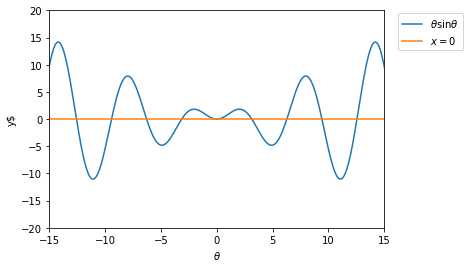

In [7]:
def lim(a):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    x= np.linspace(-12*np.pi,12*np.pi,1024,endpoint=True)

    y1= x*np.sin(x)
    ax.plot(x, y1, label='$\\theta\sin{\\theta}$')

    y2=x*0
    ax.plot(x, y2, label='$x=0$')
    # plt.axis('scaled')
    # plt.axis('equal')  
    plt.xlabel('$\\theta$')
    plt.ylabel('y$')
    plt.ylim(-20,20)
    plt.legend(loc='upper right',\
               bbox_to_anchor=(1.25, 1.01),ncol=1)
    plt.xlim(-a,a)
    plt.show()
    
lim(15)
# interact(lim, a = widgets.FloatSlider(value=15, min=0, max=15,step=0.1))

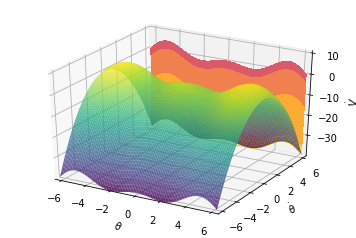

In [8]:
# %matplotlib notebook
# # plt.switch_backend(notebook)
# %matplotlib notebook
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

#creating grid
def func(thta):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = np.linspace(-thta,thta,100)
    y = np.linspace(-thta,thta,100)
    x,y = np.meshgrid(x,y)
    z = -y*y-x*np.sin(x)
    
    ax.plot_surface(x, y, z,alpha=0.8, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
    
#     cset = ax.contourf(x, y, z, zdir='z', offset=-150, cmap=cm.warmcool)
#     cset = ax.contourf(x, y, z, zdir='x', offset=-15, cmap=cm.coolwarm)
    cset = ax.contourf(x, y, z, zdir='y', offset=thta, cmap=cm.plasma)
    
    ax.set_xlabel('$\\theta$')
    ax.set_ylabel('$\dot{\\theta}$')
    ax.set_zlabel('$\dot{V}$')
    ax.set_xlim(-thta,thta)
    ax.set_ylim(-thta,thta)
    ax.set_zlim(-thta*thta,10)
    plt.show()

func(2*np.pi)
# interact(func, thta = widgets.FloatSlider(value=2*np.pi, min=0, max=10,step=0.5))


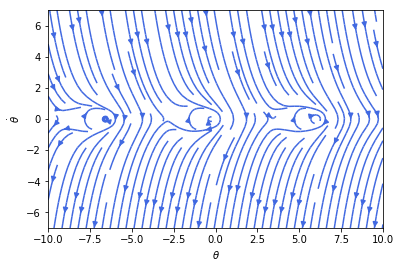

In [9]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
import pylab as plb

show = 0

def lim(a):
    if show==0:
        den = 1.5
        ylm = 7
    elif show ==1:
        den = 5
        ylm = 2
    x1values, x2values = plb.meshgrid(np.linspace(-10, 10, 20), \
                                      np.linspace(-10, 10, 20), \
                                      sparse=False)
    x1dot = x2values
    x2dot = -x2values*x2values-np.sin(x1values)
    plb.streamplot(x1values, x2values, x1dot, x2dot, \
                   color='royalblue' , density=den)# density=5
    plb.xlabel('$\\theta$')
    plb.ylabel('$\dot{\\theta}$')
    plb.ylim(-ylm,ylm)
    plb.xlim(-a,a)
    # plb.ylim(-2,2)
    # plb.xlim(-5,5)
    # interact(plot_func, freq = widgets.FloatSlider(value=2.5, min=1, 

    plb.show()
lim(10)  
# interact(lim, a = widgets.FloatSlider(value=10, min=0, max=10,step=0.1))

Above all,     
1. $\theta \in (\pm2k\pi,\pm(2k+1)\pi) \Rightarrow \theta \sin{\theta} >0, \dot{V}_2(x) \leq 0 $.   
The system is stable at those equilibrum points.
2. $\theta \in (\pm(2k+1)\pi,\pm 2(k+1)\pi) \Rightarrow \theta \sin{\theta} <0, \exists \theta: V_2>0$.   
The system is unstable at those equilibrum points.    
(*where k is a positive integer.*)

Rigorously, in real physical world, $\theta$ in a pendulum system only could be $\pm \pi$. The system is stable.
<div>
<center>
    <img src="./slide/img/pendulum.svg" style="width: 40%;height: 40%"/>
</center>
</div>

# Thank you.